#Mini Project Day

##1 - Introduction to the Dataset:



here i load the csv file and i display the first 5 rows

In [480]:
import pandas as pd
survey_df = pd.read_csv("survey.csv")
survey_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


i can see here that we have 27 columns all object except the age.

In [481]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [482]:
survey_df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


here i display all the unique value to have an understanding of what i have in my data

In [483]:
for col in survey_df.select_dtypes(include='object'):
    print(f"Unique values in {col}: {survey_df[col].unique()}")


Unique values in Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Af

here i display the sum of all null value for each columns


In [484]:
survey_df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


here i display the count of each data type

In [485]:
survey_df.dtypes.value_counts()

,count
object,26
int64,1


here i can see that this distribution has an anonali. the x axis seems to have really huge value(maybe an error...)


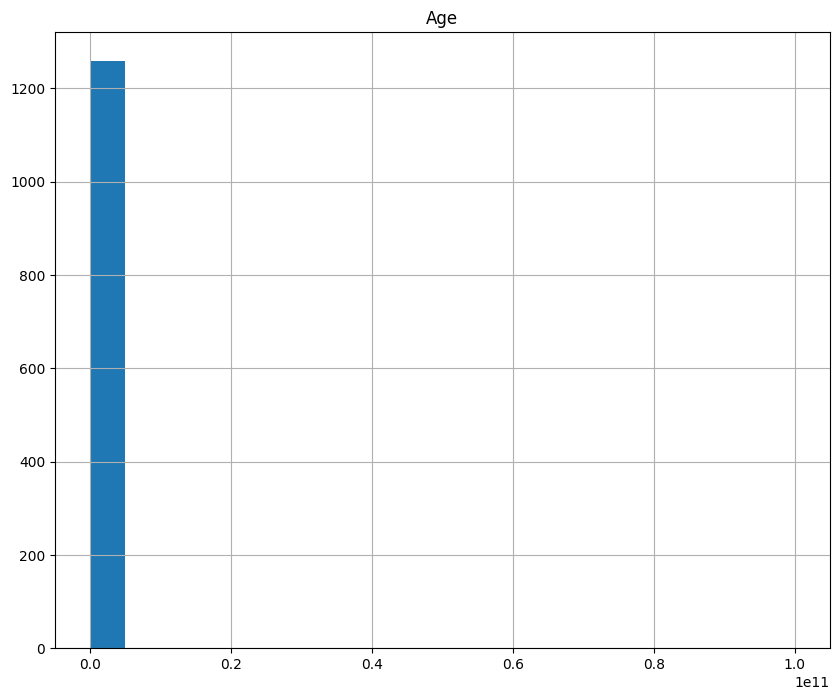

In [486]:
import matplotlib.pyplot as plt

survey_df.hist(bins=20, figsize=(10, 8))
plt.show()


In [487]:
survey_df['Age'].describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


clearly there is anomalies in the column age on our data set. that's explain why the histogram is difficult to interpret

In [488]:
Q1 = survey_df['Age'].quantile(0.25)
Q1

27.0

In [489]:
Q3 = survey_df['Age'].quantile(0.75)
Q3

36.0

In [490]:
Q1 = survey_df['Age'].quantile(0.25)
Q3 = survey_df['Age'].quantile(0.75)

In [491]:
IQR = Q3 - Q1
IQR

9.0

In [492]:
outlier_condition = (survey_df['Age'] < (Q1 - 1.5 * IQR)) | (survey_df['Age'] > (Q3 + 1.5 * IQR))

Conclusion: my action plan will be :

1.   Checking and removing duplicates:
2.   Handle the outliers in Age
3.   Handle the NaN values
4.   encode categorical value
5.   Checking if there are useless/redundant columns








##2 - Data Cleaning

1.  here i have 0 duplicated line so, we don't need to drop something





In [493]:
survey_df.duplicated().sum()

0

2. Handling the Outlier of the Age Column

In [494]:
outlier_condition.sum()

40

we have 40 outliers value, there aren't a lot of outliers but the value ​seem completely wrong, no i check the outlier.


In [495]:
survey_df[outlier_condition]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
38,2014-08-27 11:42:08,50,M,United States,IN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
347,2014-08-27 14:45:45,54,M,United States,CA,No,Yes,Yes,Never,More than 1000,...,Don't know,No,No,No,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
372,2014-08-27 15:21:59,55,M,United States,PA,No,Yes,Yes,Rarely,More than 1000,...,Very easy,No,No,Yes,Yes,No,No,Yes,No,My refer to the mental health issue of depress...
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
419,2014-08-27 15:31:40,55,M,United States,ID,No,Yes,Yes,Sometimes,1-5,...,Don't know,Yes,Maybe,No,No,No,No,No,Yes,NaN
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN


And like i see here there is negative Age or too young to be in a tech industry and Age above 120 years so i will firstly handle by removing them

In [496]:
survey_df = survey_df[survey_df['Age'].between(18, 120)]
survey_df[outlier_condition]

<ipython-input-496-4908e4c36332>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survey_df[outlier_condition]


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
38,2014-08-27 11:42:08,50,M,United States,IN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
347,2014-08-27 14:45:45,54,M,United States,CA,No,Yes,Yes,Never,More than 1000,...,Don't know,No,No,No,Yes,No,No,Don't know,No,NaN
372,2014-08-27 15:21:59,55,M,United States,PA,No,Yes,Yes,Rarely,More than 1000,...,Very easy,No,No,Yes,Yes,No,No,Yes,No,My refer to the mental health issue of depress...
419,2014-08-27 15:31:40,55,M,United States,ID,No,Yes,Yes,Sometimes,1-5,...,Don't know,Yes,Maybe,No,No,No,No,No,Yes,NaN
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
471,2014-08-27 16:13:40,58,Male,United States,CA,No,No,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
475,2014-08-27 16:15:26,57,Male,United States,CA,No,No,Yes,Sometimes,More than 1000,...,Don't know,Maybe,Maybe,No,No,No,Maybe,Don't know,No,NaN
498,2014-08-27 16:28:20,54,Male,United Kingdom,NaN,No,No,Yes,Sometimes,More than 1000,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN


verification: now the distribution seems correct

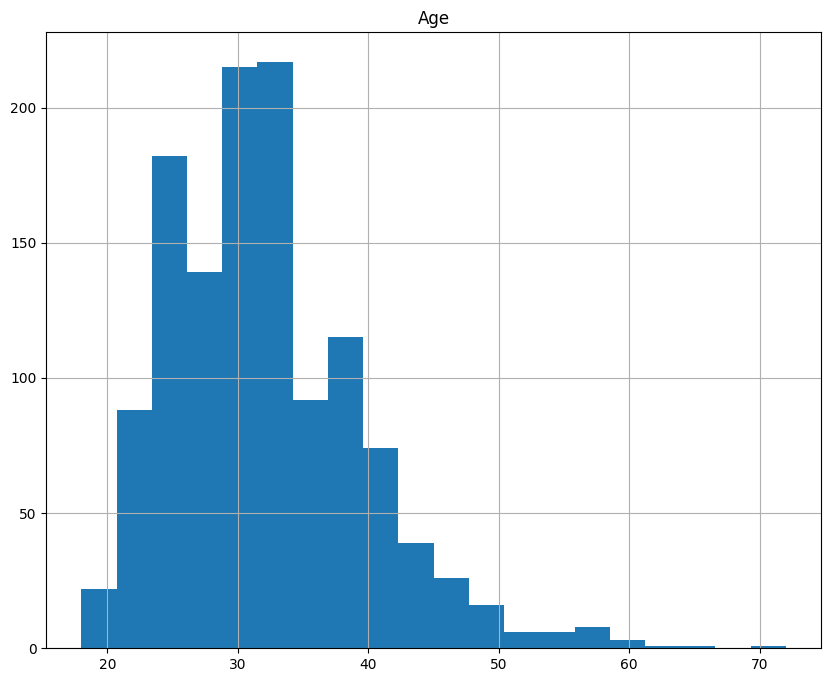

In [497]:
survey_df.hist(bins=20, figsize=(10, 8))
plt.show()

3.  Handling the NAN Values: now i will handle the NaN values in the differents columns
i will firstly start with the state value

In [498]:
survey_df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,513
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0


In [499]:
survey_df[['state', 'Country']].head(15)

,state,Country
0,IL,United States
1,IN,United States
2,NaN,Canada
3,NaN,United Kingdom
4,TX,United States
5,TN,United States
6,MI,United States
7,NaN,Canada
8,IL,United States
9,NaN,Canada


In [500]:
filtered_df = survey_df[survey_df['Country'] != 'United States']

In [501]:
filtered_df[['state', 'Country']].head(15)

,state,Country
2,NaN,Canada
3,NaN,United Kingdom
7,NaN,Canada
9,NaN,Canada
11,NaN,Bulgaria
14,NaN,Canada
16,NaN,United Kingdom
19,NaN,France
29,NaN,United Kingdom
30,NaN,United Kingdom


we can see here the value is to NaN every time the country is not US so, we can just drop the column state because irrevelant in view of the data set or we can just fill NaN value with irrevelent (because irrevelent outside the US) so we can keep the information for the US and maybe we can do a focus study on US later

In [502]:
survey_df['state'] = survey_df['state'].fillna('Irrevelent')
survey_df[['state', 'Country']].head(15)


,state,Country
0,IL,United States
1,IN,United States
2,Irrevelent,Canada
3,Irrevelent,United Kingdom
4,TX,United States
5,TN,United States
6,MI,United States
7,Irrevelent,Canada
8,IL,United States
9,Irrevelent,Canada


In [503]:
survey_df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0


Only 18 values are Nan in self_employed so i decide to handle the missig value with mode

In [504]:
survey_df['self_employed'] = survey_df['self_employed'].fillna(survey_df['self_employed'].mode()[0])
survey_df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,262
no_employees,0


In [505]:
survey_df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

we have here an catergorical column

In [506]:
survey_df['work_interfere'] = survey_df['work_interfere'].fillna(survey_df['work_interfere'].mode()[0])
survey_df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


Here for the columns comments, there 1090 rows of NAN values.
we have two options:


1.   Drop the entire columns but we definitely lose the colunns section and what infomation could bring
2.   We can interpret the lack of value by the desire not to leave a comment and so fill the NaN value with a comment like 'does not want to leave a comment' and so we can use later for NLP analyze

i decide to keep the columns and fill NAN values.

In [507]:
survey_df['comments'] = survey_df['comments'].fillna('does not want to leave a comment')
survey_df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


4.   Now we can encode categorical value and clearly see what columns is a potential categorical value. ( if the unique value are little )

In [508]:
survey_df.describe(include='object')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
unique,1239,46,46,46,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,158
top,2014-08-27 12:44:51,Male,United States,Irrevelent,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,does not want to leave a comment
freq,2,612,746,513,1109,762,632,726,289,880,...,561,487,920,771,512,1003,555,574,1070,1090


In [509]:
survey_df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [510]:
survey_df['self_employed'] = survey_df['self_employed'].map({'No': 0, 'Yes': 1})


In [511]:
survey_df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [512]:
survey_df['treatment'] = survey_df['treatment'].map({'No': 0, 'Yes': 1})
survey_df['treatment'].unique()

array([1, 0])

In [513]:
survey_df['tech_company'] = survey_df['tech_company'].map({'No': 0, 'Yes': 1})
survey_df['tech_company'].unique()

array([1, 0])

In [514]:
survey_df['remote_work'] = survey_df['remote_work'].map({'No': 0, 'Yes': 1})
survey_df['remote_work'].unique()

array([0, 1])

In [515]:
survey_df['family_history'] = survey_df['family_history'].map({'No': 0, 'Yes': 1})
survey_df['family_history'].unique()

array([0, 1])

again label encoding because this column is a ordinal categorical column and i rename it by size_company

In [516]:
mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}
survey_df['no_employees'] = survey_df['no_employees'].map(mapping)
survey_df.rename(columns={'no_employees' : 'size_company'}, inplace=True)
survey_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      1251 non-null   object
 5   self_employed              1251 non-null   int64 
 6   family_history             1251 non-null   int64 
 7   treatment                  1251 non-null   int64 
 8   work_interfere             1251 non-null   object
 9   size_company               1251 non-null   int64 
 10  remote_work                1251 non-null   int64 
 11  tech_company               1251 non-null   int64 
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

same for work_interfere

In [517]:
mapping = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
}
survey_df['work_interfere'] = survey_df['work_interfere'].map(mapping)
survey_df.rename(columns={'work_interfere' : 'work_interfere_level'}, inplace=True)
survey_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      1251 non-null   object
 5   self_employed              1251 non-null   int64 
 6   family_history             1251 non-null   int64 
 7   treatment                  1251 non-null   int64 
 8   work_interfere_level       1251 non-null   int64 
 9   size_company               1251 non-null   int64 
 10  remote_work                1251 non-null   int64 
 11  tech_company               1251 non-null   int64 
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

Now i want to work on Gender columns and they are to many gender so i will work to have 3 gender male/female/other


In [518]:
survey_df['Gender'].value_counts()

,count
Gender,
Male,612
male,204
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


In [519]:
survey_df['Gender'] = survey_df['Gender'].str.lower().str.strip()
survey_df['Gender'].value_counts()

,count
Gender,
male,819
female,185
m,150
f,53
make,4
woman,4
cis male,3
man,2
female (trans),2


In [520]:
survey_df['Gender'].value_counts()

,count
Gender,
male,819
female,185
m,150
f,53
make,4
woman,4
cis male,3
man,2
female (trans),2


In [523]:
survey_df['Gender'] = survey_df['Gender'].replace({
    'male': 'Male','m': 'Male',
    'make' : 'Male','man' : 'Male',
    'cis male' : 'Male','mail' : 'Male',
    'male leaning androgynous' : 'Male',
    'msle' : 'Male','cis male' : 'Male',
    'male' : 'Male','malr' : 'Male',
    'cis man' : 'Male','dude' : 'Male',
    'guy (-ish) ^_^' : 'Male','male (cis)' : 'Male',
    'mal' : 'Male','something kinda male?' : 'Male',
    'maile' : 'Male','male-ish' : 'Male',
    'ostensibly male, unsure what that really means' : 'Male',
    'female' : 'Female','f' : 'Female',
    'woman' : 'Female','femail' : 'Female',
    'cis female' : 'Female','female (cis)' : 'Female',
    'femake' : 'Female','cis-female/femme' : 'Female',
    'queer/she/they': 'Female','non-binary' : 'Other',
    'nah' : 'Other','All' : 'Other',
    'enby' : 'Other','fluid' : 'Other',
    'agender' : 'Other','genderqueer' : 'Other',
    'androgyne' : 'Other','trans' : 'Other',
    'queer' : 'Other','female (trans)' :'Other',
    'trans woman' : 'Other','trans-female' : 'Other',
    'neuter':'Other'
})



In [522]:
survey_df['Gender'].value_counts()

,count
Gender,
Male,990
Female,248
Other,13


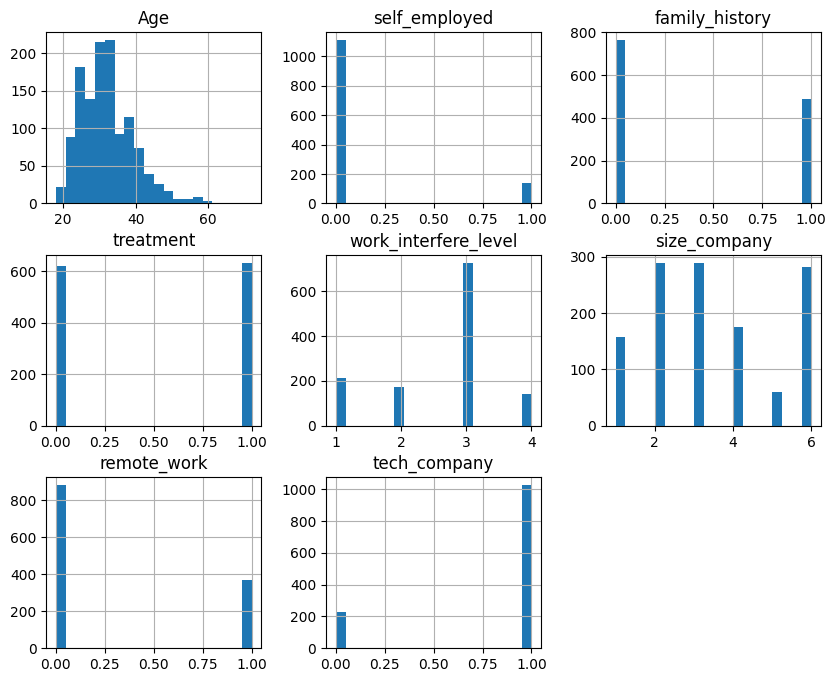

In [524]:
survey_df.hist(bins=20, figsize=(10, 8))
plt.show()